In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1

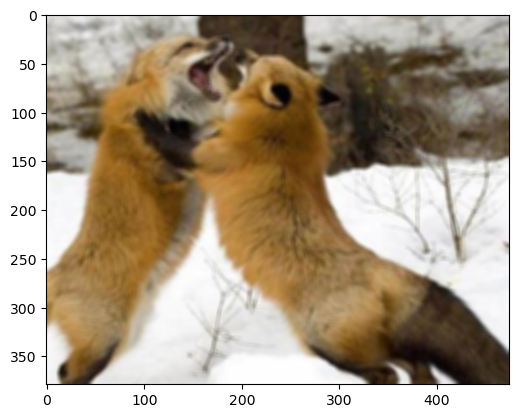

In [4]:
fox_path = "fox.jpg"
fox = cv2.imread(fox_path)
fox_blur1 = cv2.blur(fox, (5,5))
fox_blur1_rgb = cv2.cvtColor(fox_blur1, cv2.COLOR_BGR2RGB)
plt.imshow(fox_blur1_rgb)

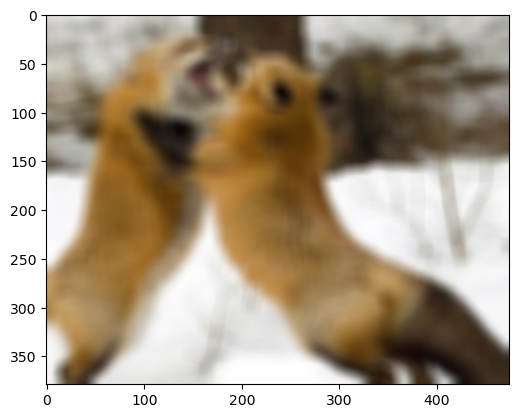

In [5]:
fox_blur2 = cv2.blur(fox, (15,15))
fox_blur2_rgb = cv2.cvtColor(fox_blur2, cv2.COLOR_BGR2RGB)
plt.imshow(fox_blur2_rgb)

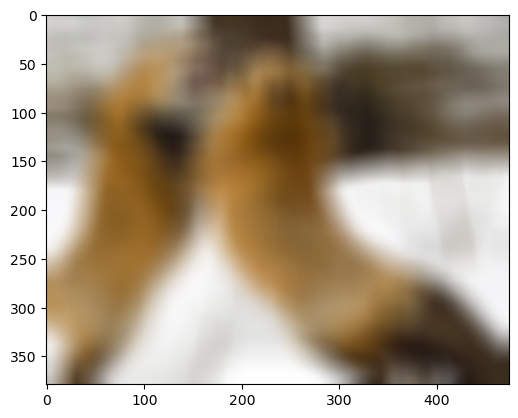

In [6]:
fox_blur3 = cv2.blur(fox, (35,35))
fox_blur3_rgb = cv2.cvtColor(fox_blur3, cv2.COLOR_BGR2RGB)
plt.imshow(fox_blur3_rgb)

### 2

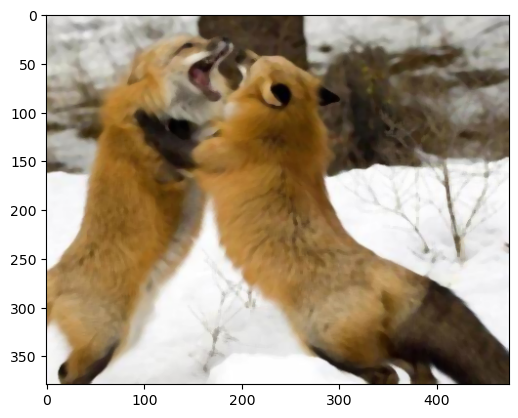

In [9]:
fox_medianblur1 = cv2.medianBlur(fox, 5)
fox_medianblur1_rgb = cv2.cvtColor(fox_medianblur1, cv2.COLOR_BGR2RGB)
plt.imshow(fox_medianblur1_rgb)

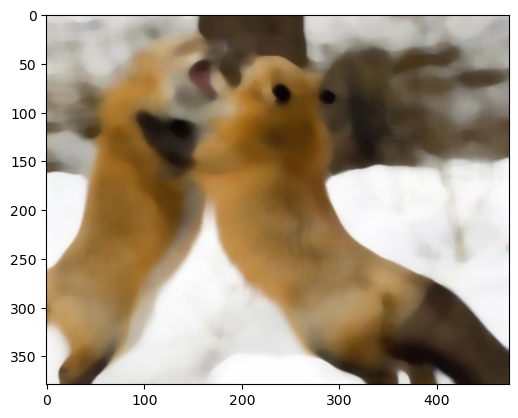

In [10]:
fox_medianblur2 = cv2.medianBlur(fox, 15)
fox_medianblur2_rgb = cv2.cvtColor(fox_medianblur2, cv2.COLOR_BGR2RGB)
plt.imshow(fox_medianblur2_rgb)

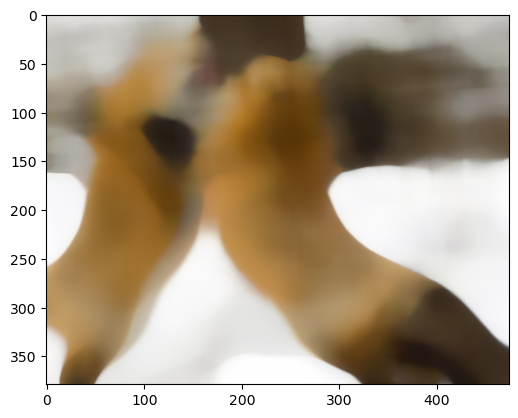

In [11]:
fox_medianblur3 = cv2.medianBlur(fox, 35)
fox_medianblur3_rgb = cv2.cvtColor(fox_medianblur3, cv2.COLOR_BGR2RGB)
plt.imshow(fox_medianblur3_rgb)

### 3

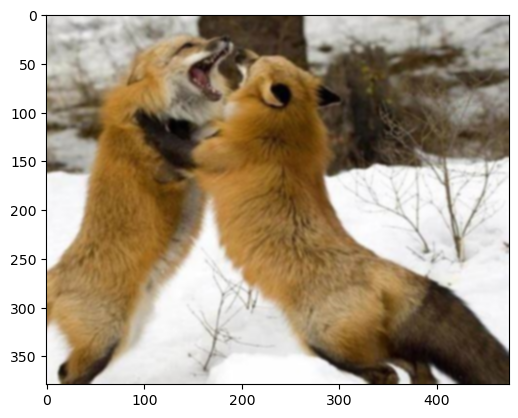

In [12]:
fox_gaussianblur1 = cv2.GaussianBlur(fox, (5,5), 0)
fox_gaussianblur1_rgb = cv2.cvtColor(fox_gaussianblur1, cv2.COLOR_BGR2RGB)
plt.imshow(fox_gaussianblur1_rgb)

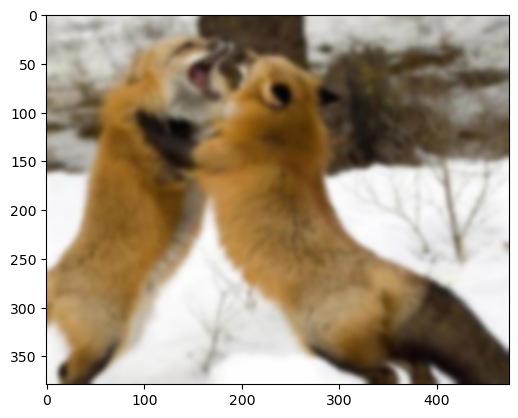

In [13]:
fox_gaussianblur2 = cv2.GaussianBlur(fox, (15,15), 0)
fox_gaussianblur2_rgb = cv2.cvtColor(fox_gaussianblur2, cv2.COLOR_BGR2RGB)
plt.imshow(fox_gaussianblur2_rgb)

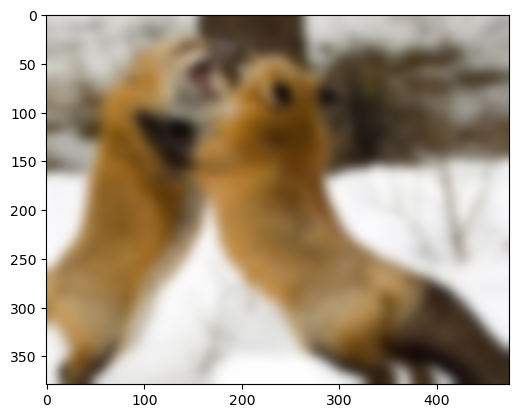

In [14]:
fox_gaussianblur3 = cv2.GaussianBlur(fox, (35,35), 0)
fox_gaussianblur3_rgb = cv2.cvtColor(fox_gaussianblur3, cv2.COLOR_BGR2RGB)
plt.imshow(fox_gaussianblur3_rgb)

### 4

In [27]:
squirre_path = "squirre.jpg"
squirre = cv2.imread(squirre_path)

for i in range(3,34,3):
    squirre_blur = cv2.blur(squirre, (i,i))
    save_path = "C:\\Users\\Okita\\Downloads\\robotics , AI\\python\\kadai10\\squirre_blur{}.jpg".format(i//3)
    cv2.imwrite(save_path, squirre_blur)

### 5

In [111]:
def blur_error(img,x1,y1,x2,y2,fil_x,fil_y):
    w,h,c = img.shape
    k = 0
    if (x1<0 or w<x1) or (y1<0 or h<y1):
        print("error：始点が範囲外です")
        k += 1
        
    if (x2<0 or w<x2) or (y2<0 or h<y2):
        print("error：終点が範囲外です")
        k += 1
        
    if x1 >= x2:
        print("error：始点の位置が逆です")
        k += 1
        
    if y1 >= y2:
        print("error：終点の位置が逆です")
        k += 1
        
    if (fil_x % 2 == 0) or (fil_y % 2 == 0):
        print("error：カーネルサイズを奇数にしてください")
        k += 1
    
    return k

def my_blur(img,x1,y1,x2,y2,fil_x,fil_y):
    k = blur_error(img,x1,y1,x2,y2,fil_x,fil_y)
    if k == 0:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_area = img_rgb[y1:y2,x1:x2]
        img_blur = cv2.blur(img_area, (fil_x, fil_y))
        plt.imshow(img_blur)

img_path = "dog.jpg"
img = cv2.imread(img_path)

x1    = 0
y1    = 0
x2    = 600
y2    = 350
fil_x = 5
fil_y = 5
my_blur(img,x1,y1,x2,y2,fil_x,fil_y)

error：始点が範囲外です


### 6

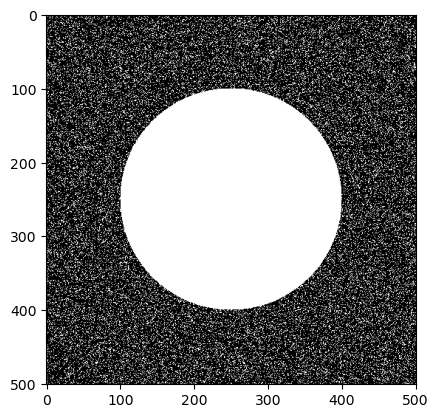

In [69]:
x = 501
y = 501
mat = np.random.randint(0,256,(x,y),np.uint8)
ret, mat_thresh = cv2.threshold(mat, 210, 255, cv2.THRESH_BINARY)
mat_circle = cv2.circle(mat_thresh, (x//2, y//2), (150), (255), -1)
plt.imshow(mat_thresh, 'gray')

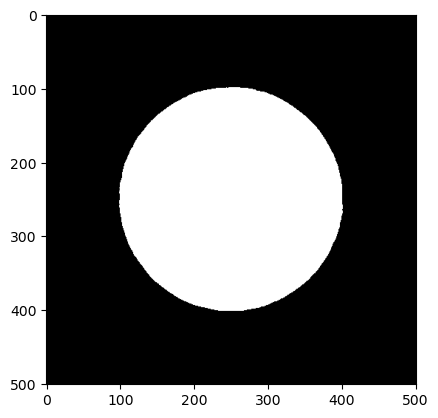

In [91]:
mat_median = cv2.medianBlur(mat_thresh, 15)
plt.imshow(mat_median,'gray')

### 7

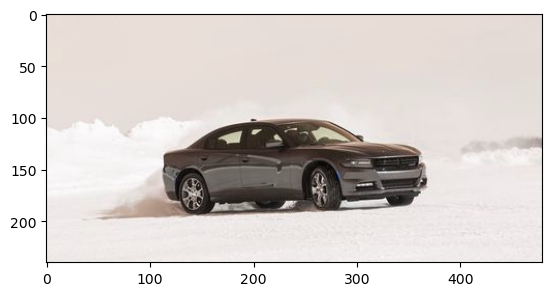

In [52]:
car_path = "carinsnow.jpg"
car = cv2.imread(car_path)
plt.imshow(car)

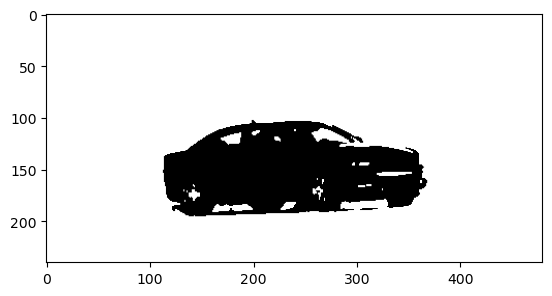

In [53]:
car_gray        = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
car_blur        = cv2.blur(car_gray, (3,3))
ret, car_thresh = cv2.threshold(car_blur, 127,255,cv2.THRESH_BINARY)
car_erode       = cv2.erode(car_thresh, (5,5),2)
car_dilate      = cv2.dilate(car_erode, (5,5),2)
plt.imshow(car_dilate, 'gray')

### 8

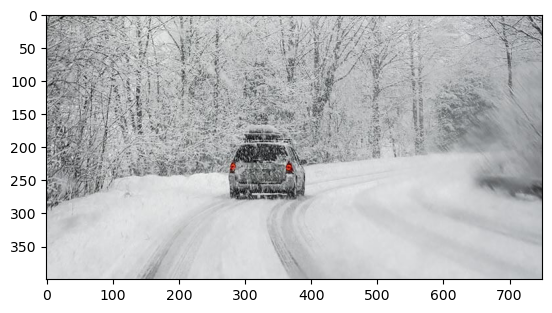

In [5]:
car_path = "carinsnow2.jpg"
car2 = cv2.imread(car_path)
car2_rgb = cv2.cvtColor(car2, cv2.COLOR_BGR2RGB)
plt.imshow(car2_rgb)

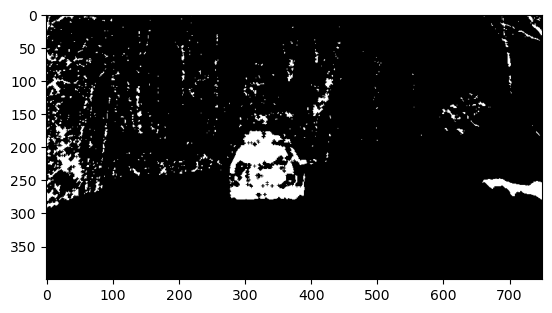

In [101]:
cross_ker         = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
car2_gray         = cv2.cvtColor(car2, cv2.COLOR_BGR2GRAY)
car2_gaussian     = cv2.GaussianBlur(car2_gray,(3,3),0)
ret, car2_thresh_inv  = cv2.threshold(car2_gaussian, 120, 255, cv2.THRESH_BINARY_INV)
car2_dilate       = cv2.dilate(car2_thresh_inv, cross_ker,7)
car2_erode        = cv2.erode(car2_dilate, cross_ker, 7)
plt.imshow(car2_erode, 'gray')